# Wiggle_Net: Event Localisation + Clasiification



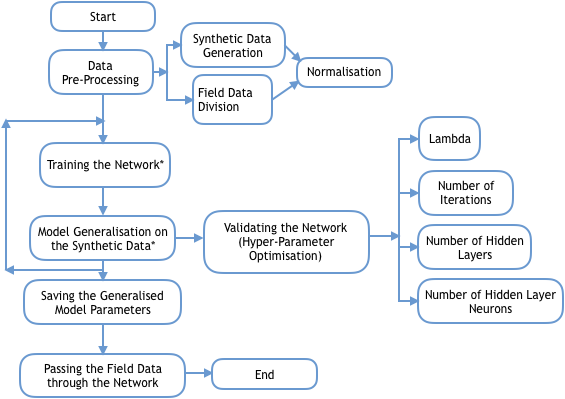   

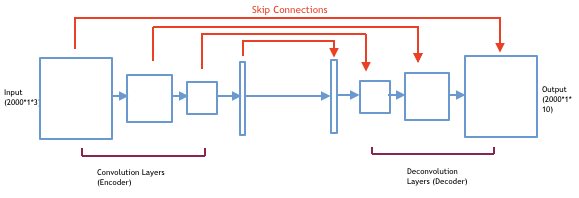

In [ ]:
#File input output
import os
#matrix math
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#data preprocessing 
import pandas as pd
#deep learning
import h5py
import math

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K

%matplotlib inline

In [ ]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

In [ ]:
im_width = 2000
im_height = 1
im_chan = 3 # Number of channels: first is original and second cumsum(axis=0)
#n_features = 1 # Number of extra features
#path_train = '../input/train/'
#path_test = '../input/test/'


In [ ]:
# Build U-Net model
def WiggleNet(input_shape)

input_img = Input(shape = input_shape, name='img')
#input_features = Input((n_features, ), name='feat')

c1 = Conv2D(16, (1, 128), activation='relu', padding='same') (input_img)
c1 = Conv2D(16, (1, 128), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((1, 2)) (c1)

c2 = Conv2D(32, (1, 64), activation='relu', padding='same') (p1)
c2 = Conv2D(32, (1, 64), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((1, 2)) (c2)

c3 = Conv2D(64, (1, 32), activation='relu', padding='same') (p2)
c3 = Conv2D(64, (1, 32), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((1, 2)) (c3)

c4 = Conv2D(128, (1, 16), activation='relu', padding='same') (p3)
c4 = Conv2D(128, (1, 16), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(1, 2)) (c4)

## Join features information in the depthest layer
#f_repeat = RepeatVector(8*8)(input_features)
#f_conv = Reshape((8, 8, n_features))(f_repeat)
#p4_feat = concatenate([p4, f_conv], -1)

c5 = Conv2D(256, (1, 16), activation='relu', padding='same') (p4_feat)
c5 = Conv2D(256, (1, 16), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(128, (1, 2), strides=(1, 2), padding='same') (c5)
#check out this skip connection thooooo
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (1, 16), activation='relu', padding='same') (u6)
c6 = Conv2D(128, (1, 16), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(64, (1, 2), strides=(1, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (1, 32), activation='relu', padding='same') (u7)
c7 = Conv2D(64, (1, 32), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(32, (1, 2), strides=(1, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (1, 64), activation='relu', padding='same') (u8)
c8 = Conv2D(32, (1, 64), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(16, (1, 2), strides=(1, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (1, 128), activation='relu', padding='same') (u9)
c9 = Conv2D(16, (1, 128), activation='relu', padding='same') (c9)

outputs = Conv2D(10, (1, 1), activation='softmax') (c9)

model = Model(inputs=[input_img], outputs=[outputs])

return model
#wiggle_net.compile(optimizer='adam', loss='categorical_crossentropy') #, metrics=[mean_iou]) # The mean_iou metrics seens to leak train and test values...
#wiggle_net.summary()

In [ ]:
wiggle_net = WiggleNet(input_shape = (2000, 1, 3))

In [ ]:
wiggle_net.complie(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
wiggle_net.fit(x = X_train, y = Y_train, epochs = 40, batch_size = 64)

In [ ]:
preds = wiggle_net.evaluate(x = X_test, y = Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(cls_pred):

    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    print("Confusion matrix:")
    
    print(cm)
    
    for i, class_name in enumerate(class_names):
        print("({0}) {1}".format(i, class_name))

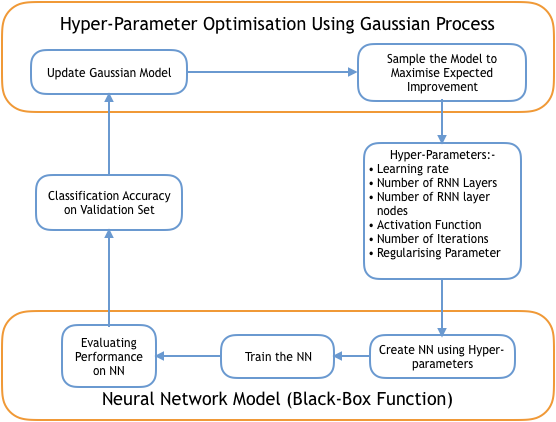